# LSTM Example Using Flights Dataset from Seaborn

In this notebook, we will be using a Vanilla RNN and a LSTM to predict the patterns seen in the number of flight passengers each month since 1949. We will then visually compare the performance of these prediction models.

### Import Necessary Packages

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


### Some Exploratory Data Analysis

Here we take a look at the format the data comes in, and the pattern that we are trying to predict.

In [2]:
flight_df = sns.load_dataset("flights")

In [3]:
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


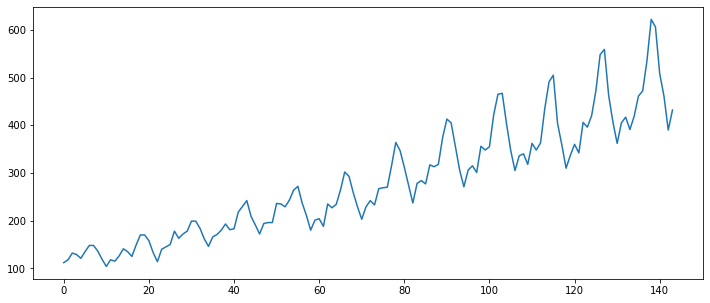

In [4]:
plt.figure(figsize=[12., 5.])
flight_df['passengers'].plot(kind='line');

### Preprocess the data

Here we convert integer amount of passengers into floats for better computations. Also, we split the original training and validation datasets. Then, we try to scale the data for some normalization for more stable processing in the neuro netwoks.

In [5]:
# Convert passenter data to float32 for better processing
flight_df['passengers'] = flight_df['passengers'].astype(np.float32)

# Reserve last 12 months as test set:
train_data = flight_df['passengers'][:-12]
valid_data = flight_df['passengers'][-12:]

# scale data for better training and more stability
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
valid_data = (valid_data - train_mean) / train_std

In [6]:
# We use each datapoint to predict the next one, so x will be one datapoint and y will be the next
# However, we can train the model differently so that we use more datapoints in each X
train_gen = TimeseriesGenerator(train_data, train_data, length=1, sampling_rate=1, batch_size=1)

In [7]:
train_X = []
train_y = []
for i in range(0, len(train_gen)):
    x, y = train_gen[i]
    train_X.append(np.array(x))
    train_y.append(y[0])
    print(str(x[0]) + "=>" + str(y))

[-1.4114074]=>[-1.3551358]
[-1.3551358]=>[-1.2238355]
[-1.2238355]=>[-1.2519712]
[-1.2519712]=>[-1.327]
[-1.327]=>[-1.1956997]
[-1.1956997]=>[-1.073778]
[-1.073778]=>[-1.073778]
[-1.073778]=>[-1.1863211]
[-1.1863211]=>[-1.3457572]
[-1.3457572]=>[-1.4864361]
[-1.4864361]=>[-1.3551358]
[-1.3551358]=>[-1.3832716]
[-1.3832716]=>[-1.280107]
[-1.280107]=>[-1.1394281]
[-1.1394281]=>[-1.1956997]
[-1.1956997]=>[-1.2894857]
[-1.2894857]=>[-1.0643994]
[-1.0643994]=>[-0.8674489]
[-0.8674489]=>[-0.8674489]
[-0.8674489]=>[-0.9799921]
[-0.9799921]=>[-1.2144569]
[-1.2144569]=>[-1.3926502]
[-1.3926502]=>[-1.1488068]
[-1.1488068]=>[-1.1019138]
[-1.1019138]=>[-1.0550208]
[-1.0550208]=>[-0.7924202]
[-0.7924202]=>[-0.9330991]
[-0.9330991]=>[-0.84869176]
[-0.84869176]=>[-0.7924202]
[-0.7924202]=>[-0.5954697]
[-0.5954697]=>[-0.5954697]
[-0.5954697]=>[-0.73614866]
[-0.73614866]=>[-0.9424777]
[-0.9424777]=>[-1.0925351]
[-1.0925351]=>[-0.9049633]
[-0.9049633]=>[-0.8580704]
[-0.8580704]=>[-0.773663]
[-0.773663]=

In [8]:
train_X = np.array(train_X)
train_y = np.array(train_y)

### Model setup

In [35]:
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(1, 1)))
lstm_model.add(Dense(1))

In [36]:
lstm_model.compile(
    optimizer='SGD', loss="MSE",
)

In [37]:
# Reshape the input data to fit the network
train_X = train_X.reshape(131, 1, 1)

In [38]:
history = lstm_model.fit(train_X, train_y, epochs = 500)

Epoch 1/500
131/131 [==============================] - 1s 7ms/step - loss: 1.0371
Epoch 2/500
131/131 [==============================] - 0s 145us/step - loss: 1.0149
Epoch 3/500
131/131 [==============================] - 0s 139us/step - loss: 0.9913
Epoch 4/500
131/131 [==============================] - 0s 141us/step - loss: 0.9700
Epoch 5/500
131/131 [==============================] - 0s 140us/step - loss: 0.9487
Epoch 6/500
131/131 [==============================] - 0s 155us/step - loss: 0.9233
Epoch 7/500
131/131 [==============================] - 0s 143us/step - loss: 0.9016
Epoch 8/500
131/131 [==============================] - 0s 149us/step - loss: 0.8818
Epoch 9/500
131/131 [==============================] - 0s 141us/step - loss: 0.8600
Epoch 10/500
131/131 [==============================] - 0s 142us/step - loss: 0.8396
Epoch 11/500
131/131 [==============================] - 0s 146us/step - loss: 0.8183
Epoch 12/500
131/131 [==============================] - 0s 156us/step - loss

131/131 [==============================] - 0s 140us/step - loss: 0.0932
Epoch 98/500
131/131 [==============================] - 0s 164us/step - loss: 0.0926
Epoch 99/500
131/131 [==============================] - 0s 161us/step - loss: 0.0921
Epoch 100/500
131/131 [==============================] - 0s 145us/step - loss: 0.0909
Epoch 101/500
131/131 [==============================] - 0s 148us/step - loss: 0.0902
Epoch 102/500
131/131 [==============================] - 0s 147us/step - loss: 0.0894
Epoch 103/500
131/131 [==============================] - 0s 131us/step - loss: 0.0891
Epoch 104/500
131/131 [==============================] - 0s 151us/step - loss: 0.0890
Epoch 105/500
131/131 [==============================] - 0s 144us/step - loss: 0.0885
Epoch 106/500
131/131 [==============================] - 0s 145us/step - loss: 0.0882
Epoch 107/500
131/131 [==============================] - 0s 143us/step - loss: 0.0872
Epoch 108/500
131/131 [==============================] - 0s 140us/step

131/131 [==============================] - 0s 142us/step - loss: 0.0815
Epoch 193/500
131/131 [==============================] - 0s 138us/step - loss: 0.0814
Epoch 194/500
131/131 [==============================] - 0s 132us/step - loss: 0.0813
Epoch 195/500
131/131 [==============================] - 0s 140us/step - loss: 0.0813
Epoch 196/500
131/131 [==============================] - 0s 121us/step - loss: 0.0813
Epoch 197/500
131/131 [==============================] - 0s 128us/step - loss: 0.0814
Epoch 198/500
131/131 [==============================] - 0s 136us/step - loss: 0.0813
Epoch 199/500
131/131 [==============================] - 0s 132us/step - loss: 0.0814
Epoch 200/500
131/131 [==============================] - 0s 138us/step - loss: 0.0814
Epoch 201/500
131/131 [==============================] - 0s 141us/step - loss: 0.0813
Epoch 202/500
131/131 [==============================] - 0s 134us/step - loss: 0.0815
Epoch 203/500
131/131 [==============================] - 0s 141us/st

131/131 [==============================] - 0s 140us/step - loss: 0.0814
Epoch 288/500
131/131 [==============================] - 0s 145us/step - loss: 0.0813
Epoch 289/500
131/131 [==============================] - 0s 146us/step - loss: 0.0813
Epoch 290/500
131/131 [==============================] - 0s 145us/step - loss: 0.0812
Epoch 291/500
131/131 [==============================] - 0s 152us/step - loss: 0.0813
Epoch 292/500
131/131 [==============================] - 0s 160us/step - loss: 0.0812
Epoch 293/500
131/131 [==============================] - 0s 150us/step - loss: 0.0813
Epoch 294/500
131/131 [==============================] - 0s 161us/step - loss: 0.0813
Epoch 295/500
131/131 [==============================] - 0s 162us/step - loss: 0.0814
Epoch 296/500
131/131 [==============================] - 0s 156us/step - loss: 0.0812
Epoch 297/500
131/131 [==============================] - 0s 154us/step - loss: 0.0813
Epoch 298/500
131/131 [==============================] - 0s 150us/st

131/131 [==============================] - 0s 145us/step - loss: 0.0812
Epoch 383/500
131/131 [==============================] - 0s 135us/step - loss: 0.0811
Epoch 384/500
131/131 [==============================] - 0s 119us/step - loss: 0.0812
Epoch 385/500
131/131 [==============================] - 0s 137us/step - loss: 0.0812
Epoch 386/500
131/131 [==============================] - 0s 132us/step - loss: 0.0812
Epoch 387/500
131/131 [==============================] - 0s 131us/step - loss: 0.0812
Epoch 388/500
131/131 [==============================] - 0s 123us/step - loss: 0.0813
Epoch 389/500
131/131 [==============================] - 0s 135us/step - loss: 0.0812
Epoch 390/500
131/131 [==============================] - 0s 136us/step - loss: 0.0813
Epoch 391/500
131/131 [==============================] - 0s 139us/step - loss: 0.0812
Epoch 392/500
131/131 [==============================] - 0s 136us/step - loss: 0.0813
Epoch 393/500
131/131 [==============================] - 0s 137us/st

131/131 [==============================] - 0s 131us/step - loss: 0.0813
Epoch 478/500
131/131 [==============================] - 0s 139us/step - loss: 0.0813
Epoch 479/500
131/131 [==============================] - 0s 132us/step - loss: 0.0812
Epoch 480/500
131/131 [==============================] - 0s 134us/step - loss: 0.0812
Epoch 481/500
131/131 [==============================] - 0s 127us/step - loss: 0.0811
Epoch 482/500
131/131 [==============================] - 0s 139us/step - loss: 0.0813
Epoch 483/500
131/131 [==============================] - 0s 135us/step - loss: 0.0812
Epoch 484/500
131/131 [==============================] - 0s 134us/step - loss: 0.0813
Epoch 485/500
131/131 [==============================] - 0s 144us/step - loss: 0.0813
Epoch 486/500
131/131 [==============================] - 0s 140us/step - loss: 0.0811
Epoch 487/500
131/131 [==============================] - 0s 123us/step - loss: 0.0813
Epoch 488/500
131/131 [==============================] - 0s 139us/st

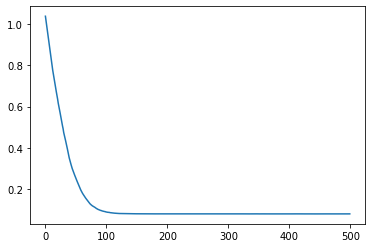

In [39]:
plt.plot(history.history['loss'])

In [40]:
# Get a prediction on the training data
train_y_pred = lstm_model.predict(train_X)
temp = []

for i in range(0, len(train_y_pred)):
    temp.append(train_y_pred[i][0])
    
train_y_pred = temp

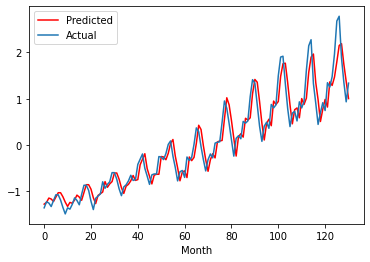

In [41]:
# Plot predicted training data vs. actual training data

plt.xlabel("Month")

plt.plot(train_y_pred, color = "red")
plt.plot(train_y)

plt.legend(["Predicted", "Actual"], loc ="upper left");

### Same process for Simple RNN

In [42]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape=(1, 1)))
rnn_model.add(Dense(1))

In [43]:
rnn_model.compile(
    optimizer='SGD', loss="MSE"
)

In [44]:
history = rnn_model.fit(train_X, train_y, epochs = 500)

Epoch 1/500
131/131 [==============================] - 1s 4ms/step - loss: 0.6537
Epoch 2/500
131/131 [==============================] - 0s 65us/step - loss: 0.3592
Epoch 3/500
131/131 [==============================] - 0s 78us/step - loss: 0.2360
Epoch 4/500
131/131 [==============================] - 0s 79us/step - loss: 0.1685
Epoch 5/500
131/131 [==============================] - 0s 74us/step - loss: 0.1295
Epoch 6/500
131/131 [==============================] - 0s 78us/step - loss: 0.1105
Epoch 7/500
131/131 [==============================] - 0s 83us/step - loss: 0.0995
Epoch 8/500
131/131 [==============================] - 0s 76us/step - loss: 0.0919
Epoch 9/500
131/131 [==============================] - 0s 79us/step - loss: 0.0872
Epoch 10/500
131/131 [==============================] - 0s 80us/step - loss: 0.0826
Epoch 11/500
131/131 [==============================] - 0s 75us/step - loss: 0.0818
Epoch 12/500
131/131 [==============================] - 0s 81us/step - loss: 0.0806
Ep

131/131 [==============================] - 0s 69us/step - loss: 0.0808
Epoch 99/500
131/131 [==============================] - 0s 80us/step - loss: 0.0813
Epoch 100/500
131/131 [==============================] - 0s 83us/step - loss: 0.0809
Epoch 101/500
131/131 [==============================] - 0s 82us/step - loss: 0.0807
Epoch 102/500
131/131 [==============================] - 0s 93us/step - loss: 0.0805
Epoch 103/500
131/131 [==============================] - 0s 97us/step - loss: 0.0813
Epoch 104/500
131/131 [==============================] - 0s 86us/step - loss: 0.0808
Epoch 105/500
131/131 [==============================] - 0s 95us/step - loss: 0.0811
Epoch 106/500
131/131 [==============================] - 0s 104us/step - loss: 0.0809
Epoch 107/500
131/131 [==============================] - 0s 92us/step - loss: 0.0804
Epoch 108/500
131/131 [==============================] - 0s 102us/step - loss: 0.0806
Epoch 109/500
131/131 [==============================] - 0s 92us/step - loss: 

131/131 [==============================] - 0s 87us/step - loss: 0.0802
Epoch 195/500
131/131 [==============================] - 0s 90us/step - loss: 0.0804
Epoch 196/500
131/131 [==============================] - 0s 106us/step - loss: 0.0805
Epoch 197/500
131/131 [==============================] - 0s 90us/step - loss: 0.0804
Epoch 198/500
131/131 [==============================] - 0s 99us/step - loss: 0.0805
Epoch 199/500
131/131 [==============================] - 0s 89us/step - loss: 0.0808
Epoch 200/500
131/131 [==============================] - 0s 95us/step - loss: 0.0803
Epoch 201/500
131/131 [==============================] - 0s 90us/step - loss: 0.0808
Epoch 202/500
131/131 [==============================] - 0s 94us/step - loss: 0.0810
Epoch 203/500
131/131 [==============================] - 0s 91us/step - loss: 0.0812
Epoch 204/500
131/131 [==============================] - 0s 81us/step - loss: 0.0809
Epoch 205/500
131/131 [==============================] - 0s 79us/step - loss: 

131/131 [==============================] - 0s 101us/step - loss: 0.0806
Epoch 291/500
131/131 [==============================] - 0s 93us/step - loss: 0.0809
Epoch 292/500
131/131 [==============================] - 0s 97us/step - loss: 0.0804
Epoch 293/500
131/131 [==============================] - 0s 97us/step - loss: 0.0810
Epoch 294/500
131/131 [==============================] - 0s 89us/step - loss: 0.0805
Epoch 295/500
131/131 [==============================] - 0s 83us/step - loss: 0.0803
Epoch 296/500
131/131 [==============================] - 0s 90us/step - loss: 0.0804
Epoch 297/500
131/131 [==============================] - 0s 92us/step - loss: 0.0806
Epoch 298/500
131/131 [==============================] - 0s 91us/step - loss: 0.0810
Epoch 299/500
131/131 [==============================] - 0s 93us/step - loss: 0.0806
Epoch 300/500
131/131 [==============================] - 0s 95us/step - loss: 0.0803
Epoch 301/500
131/131 [==============================] - 0s 89us/step - loss: 

131/131 [==============================] - 0s 96us/step - loss: 0.0812
Epoch 387/500
131/131 [==============================] - 0s 92us/step - loss: 0.0810
Epoch 388/500
131/131 [==============================] - 0s 94us/step - loss: 0.0804
Epoch 389/500
131/131 [==============================] - 0s 88us/step - loss: 0.0805
Epoch 390/500
131/131 [==============================] - 0s 74us/step - loss: 0.0808
Epoch 391/500
131/131 [==============================] - 0s 83us/step - loss: 0.0802
Epoch 392/500
131/131 [==============================] - 0s 79us/step - loss: 0.0809
Epoch 393/500
131/131 [==============================] - 0s 69us/step - loss: 0.0807
Epoch 394/500
131/131 [==============================] - 0s 73us/step - loss: 0.0815
Epoch 395/500
131/131 [==============================] - 0s 68us/step - loss: 0.0807
Epoch 396/500
131/131 [==============================] - 0s 73us/step - loss: 0.0805
Epoch 397/500
131/131 [==============================] - 0s 72us/step - loss: 0

131/131 [==============================] - 0s 75us/step - loss: 0.0808
Epoch 483/500
131/131 [==============================] - 0s 74us/step - loss: 0.0807
Epoch 484/500
131/131 [==============================] - 0s 75us/step - loss: 0.0805
Epoch 485/500
131/131 [==============================] - 0s 70us/step - loss: 0.0803
Epoch 486/500
131/131 [==============================] - 0s 76us/step - loss: 0.0802
Epoch 487/500
131/131 [==============================] - 0s 72us/step - loss: 0.0805
Epoch 488/500
131/131 [==============================] - 0s 67us/step - loss: 0.0807
Epoch 489/500
131/131 [==============================] - 0s 72us/step - loss: 0.0816
Epoch 490/500
131/131 [==============================] - 0s 71us/step - loss: 0.0815
Epoch 491/500
131/131 [==============================] - 0s 72us/step - loss: 0.0810
Epoch 492/500
131/131 [==============================] - 0s 67us/step - loss: 0.0817
Epoch 493/500
131/131 [==============================] - 0s 71us/step - loss: 0

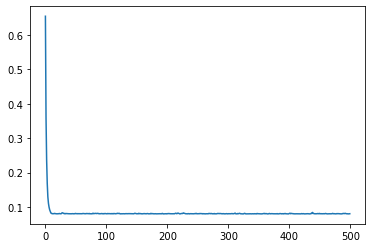

In [45]:
plt.plot(history.history['loss'])

In [46]:
train_y_pred_rnn = rnn_model.predict(train_X)
temp = []

for i in range(0, len(train_y_pred_rnn)):
    temp.append(train_y_pred_rnn[i][0])
    
train_y_pred_rnn = temp

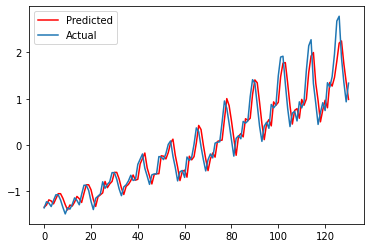

In [47]:
plt.plot(train_y_pred_rnn, color = "red")
plt.plot(train_y)
plt.legend(["Predicted", "Actual"], loc ="upper left");

#### Here we re-combine the datasets to see the performance on data that has not been trained on.

In [48]:
data = pd.concat([train_data, valid_data])

In [49]:
gen = TimeseriesGenerator(data, data, length=1, sampling_rate=1, batch_size=1)

In [50]:
X = []
Y = []
for i in range(0, len(gen)):
    x, y = gen[i]
    X.append(np.array(x))
    Y.append(y[0])

In [51]:
X = np.array(X)
Y = np.array(Y)

In [52]:
X = X.reshape(143, 1, 1)

In [53]:
y_pred_rnn = rnn_model.predict(X)
temp = []

for i in range(0, len(y_pred_rnn)):
    temp.append(y_pred_rnn[i][0])
    
y_pred_rnn = temp

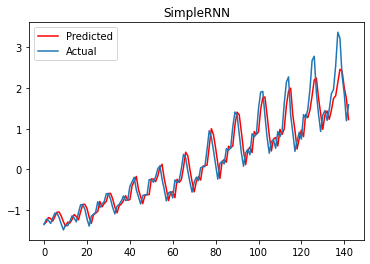

In [54]:
plt.plot(y_pred_rnn, color = "red")
plt.plot(Y)
plt.title("SimpleRNN")
plt.legend(["Predicted", "Actual"], loc ="upper left");

In [55]:
y_pred_lstm = lstm_model.predict(X)
temp = []

for i in range(0, len(y_pred_lstm)):
    temp.append(y_pred_lstm[i][0])
    
y_pred_lstm = temp

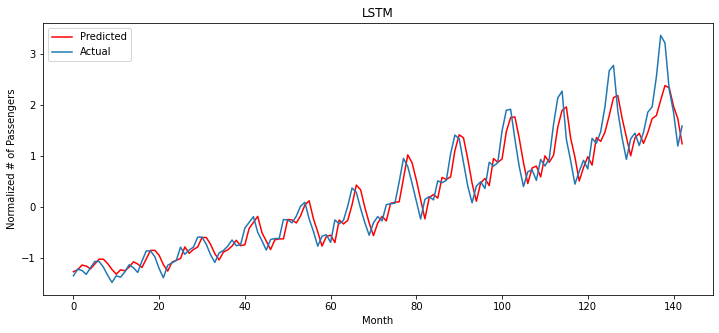

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(y_pred_lstm, color = "red")
plt.plot(Y)
plt.title("LSTM")
plt.xlabel("Month")
plt.ylabel("Normalized # of Passengers")
plt.legend(["Predicted", "Actual"], loc ="upper left");

## Issues
Looks like the prediction is highly correlated (if not almost exactly) the previous input. Referring to https://stackoverflow.com/questions/54368686/lstm-having-a-systematic-offset-between-predictions-and-ground-truth, this could be the result of having a limited dataset (only about 144 data entries). With a larger dataset and smarter tweaking of the parameters of the model, this could be resolved.

# Reference
- sdcbr (2019), LSTM having a systematic offset between predictions and ground truth. StackOverflow. https://stackoverflow.com/questions/54368686/lstm-having-a-systematic-offset-between-predictions-and-ground-truth

- The TensorFlow Family of Sites (2021), tf.keras.Model, https://www.tensorflow.org/api_docs/python/tf/keras/Model

- The TensorFlow Family of Sites (2021), tf.keras.layers.LSTM, https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

- The TensorFlow Family of Sites (2021), tf.keras.preprocessing.sequence.TimeseriesGenerator, https://www.tensorflow.org/api_docs/python/tf/keras/Model

- Brownlee, J. (2018), How to Use the TimeseriesGenerator for Time Series Forecasting in Keras, Machine Learning Mastery, https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

- The Keras Family of Sites, SimpleRNN layer, https://keras.io/api/layers/recurrent_layers/simple_rnn 

- Brownlee, J. (2018), How to Develop LSTM Models for Time Series Forecasting, Machine Learning Mastery,  https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

- wcneill (2020), pytorch13b_LSTM.ipynb, source code, https://github.com/wcneill/jn-ml-textbook/blob/master/Deep%20Learning/04%20Recurrent%20Networks/pytorch13b_LSTM.ipynb